# Advanced Lane Finding Project

## Camera Calibration
As mentioned in the rubrics, this notebook has camera calibration and image undistortion tasks.


### 1. Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.

In [1]:
# Import necessary packages
import os
import numpy as np
import cv2
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
%matplotlib inline

os.getcwd()

'C:\\Jandal\\workspace_P\\UNDSC\\CarND-Advanced-Lane-Lines'

In [2]:
# Read distorted images from the directory
path_dir = os.getcwd()+"\\camera_cal\\"

# prepare object points
nxCorners = 9 # he number of inside corners in x
nyCorners = 6 # the number of inside corners in y

# Arrays to store object & image points
objPoints = [] #3D points in real world space
imgPoints = [] #2D points in image plane

# Prepare obj points such as (0, 0, 0) ... (7, 5, 0)
objp = np.zeros((nyCorners*nxCorners, 3), np.float32)
objp[:, :2] = np.mgrid[0:nxCorners, 0:nyCorners].T.reshape(-1, 2) # x, y coordinates

#### Finding findChessboardCorners() & drawChessboardCorners() for 1 image as example

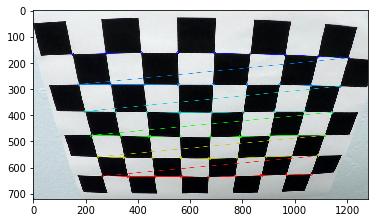

In [3]:
# Reading image one by one
img = cv2.imread(path_dir+"calibration2.jpg")

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the chessboard corners
ret, corners = cv2.findChessboardCorners(gray, (nxCorners, nyCorners), None)

# If found, draw corners
if ret == True:
    objPoints.append(objp)
    imgPoints.append(corners)

    # Draw and display the corners
    img = cv2.drawChessboardCorners(img, (nxCorners, nyCorners), corners, ret)
    plt.imshow(img)
    
    # Write the corresponding image
    img_name = os.getcwd()+'\\output_images\\'+'1_boardCorners_' + 'calibration2.jpg'
    cv2.imwrite(img_name, img)

#### Now  using cal_undistort() find undistorted image as an example

True

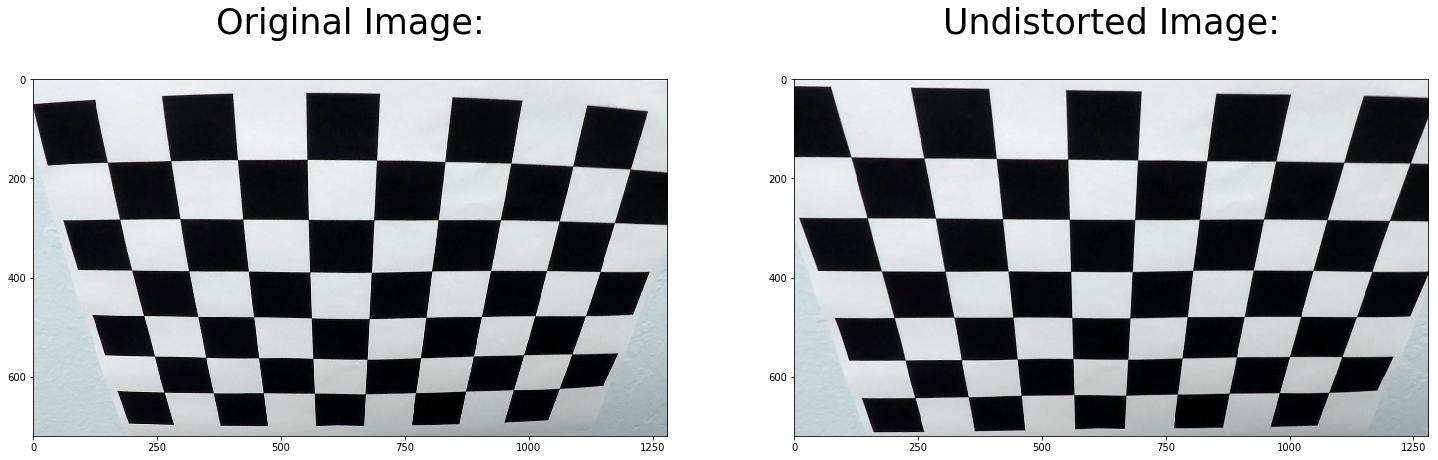

In [4]:
img = cv2.imread(path_dir+"calibration2.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, corners = cv2.findChessboardCorners(gray, (nxCorners, nyCorners), None)

if ret == True:
    objPoints.append(objp)
    imgPoints.append(corners)
    
    # Use cv2.calibrateCamera() and cv2.undistort() from opencv
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objPoints, imgPoints, img.shape[1:], None, None)
    undist = cv2.undistort(img, mtx, dist, None, mtx)

# Visualize undistorted image
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(25,10));

matplotlib.rc('xtick', labelsize=35) 
matplotlib.rc('ytick', labelsize=35)

ax1.imshow(img);
ax1.set_title('Original Image:\n', fontsize=35)
ax2.imshow(undist);
ax2.set_title('Undistorted Image:\n', fontsize=35)
# Write the corresponding image
img_name = os.getcwd()+'\\output_images\\'+'1_undistorted_' + 'calibration2.jpg'
cv2.imwrite(img_name, undist)

In [5]:
# Pickle dump to access calibration matrix and dist Coeffs
pickle_path = os.getcwd()+'\\pickled_data\\camera_calibration.p'
pickle.dump( { 'mtx': mtx, 'dist': dist }, open(pickle_path, 'wb'))